# Advanced Signal Combinations Framework

## Sophisticated Multi-Signal Trading Strategies

This notebook implements **powerful combinations** of the advanced signals from our signal bank, creating robust multi-factor trading strategies that leverage signal synergies and reduce false positives.

### 🎯 **Combination Strategy Categories:**

- **Regime-Aware Combinations** - Adapt strategy based on market conditions
- **Confirmation-Based Strategies** - Multiple signals must agree
- **Diversified Multi-Factor** - Combine uncorrelated signals
- **Hierarchical Filtering** - Primary signals with secondary filters
- **Ensemble Methods** - Weighted voting systems
- **Dynamic Allocation** - Adjust signal weights based on performance

---

In [7]:
# Setup and imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# QuantConnect imports
from AlgorithmImports import *

# Set up QuantBook
qb = QuantBook()
np.random.seed(42)

print("🚀 Signal Combinations Framework Initialized")
print("🎯 Ready to create sophisticated multi-signal strategies")

🚀 Signal Combinations Framework Initialized
🎯 Ready to create sophisticated multi-signal strategies


## 1. Regime-Aware Signal Combinations

Adapt signal combinations based on market regime detection.


In [8]:
class RegimeAwareCombinations:
    """
    Regime-Aware Signal Combinations
    Core Concept: Different signals work better in different market conditions
    """
    
    def __init__(self, signals_dict, data):
        self.signals = signals_dict
        self.data = data
        self.combinations = {}
    
    def volatility_regime_strategy(self):
        """
        Volatility Regime Strategy
        High Vol: Use momentum signals (Fractal_Hurst, KAMA, Donchian)
        Low Vol: Use mean-reversion signals (RSI, Bollinger, VWAP_ZScore)
        """
        # Detect volatility regime
        returns = self.data['close'].pct_change()
        vol_20d = returns.rolling(20).std() * np.sqrt(252)
        vol_regime = vol_20d > vol_20d.rolling(100).median()
        
        # High volatility signals (momentum)
        momentum_signals = []
        for signal_name in ['Fractal_Hurst', 'KAMA', 'Donchian_Breakout']:
            if signal_name in self.signals:
                momentum_signals.append(self.signals[signal_name])
        
        # Low volatility signals (mean reversion)  
        mean_rev_signals = []
        for signal_name in ['VWAP_ZScore', 'BB_Squeeze', 'Round_Number_Psychology']:
            if signal_name in self.signals:
                mean_rev_signals.append(self.signals[signal_name])
        
        # Combine based on regime
        combined_signals = np.zeros(len(self.data))
        
        for i in range(len(self.data)):
            if vol_regime.iloc[i]:  # High volatility - use momentum
                if momentum_signals:
                    momentum_votes = [sig[i] for sig in momentum_signals]
                    combined_signals[i] = np.sign(np.mean(momentum_votes))
            else:  # Low volatility - use mean reversion
                if mean_rev_signals:
                    mean_rev_votes = [sig[i] for sig in mean_rev_signals]
                    combined_signals[i] = np.sign(np.mean(mean_rev_votes))
        
        self.combinations['Volatility_Regime'] = combined_signals
        return combined_signals
    
    def trend_vs_chop_strategy(self):
        """
        Trend vs Chop Strategy
        Trending: Use trend-following signals
        Choppy: Use contrarian signals
        """
        # Detect trend vs chop using ADX-like measure
        high_low = self.data['high'] - self.data['low']
        close_prev = abs(self.data['close'] - self.data['close'].shift(1))
        true_range = np.maximum(high_low, close_prev)
        
        # Directional movement
        plus_dm = np.where(
            (self.data['high'] - self.data['high'].shift(1)) > 
            (self.data['low'].shift(1) - self.data['low']),
            np.maximum(self.data['high'] - self.data['high'].shift(1), 0), 0
        )
        minus_dm = np.where(
            (self.data['low'].shift(1) - self.data['low']) > 
            (self.data['high'] - self.data['high'].shift(1)),
            np.maximum(self.data['low'].shift(1) - self.data['low'], 0), 0
        )
        
        # Trend strength
        plus_di = 100 * pd.Series(plus_dm).rolling(14).mean() / true_range.rolling(14).mean()
        minus_di = 100 * pd.Series(minus_dm).rolling(14).mean() / true_range.rolling(14).mean()
        adx = 100 * abs(plus_di - minus_di) / (plus_di + minus_di)
        
        trending = adx > 25  # Strong trend
        
        # Trending signals
        trend_signals = []
        for signal_name in ['KAMA', 'Donchian_Breakout', 'ML_GradientBoosting']:
            if signal_name in self.signals:
                trend_signals.append(self.signals[signal_name])
        
        # Choppy/contrarian signals
        contrarian_signals = []
        for signal_name in ['VWAP_ZScore', 'Gap_Fill', 'Vol_Spike_Fade']:
            if signal_name in self.signals:
                contrarian_signals.append(self.signals[signal_name])
        
        # Combine based on regime
        combined_signals = np.zeros(len(self.data))
        
        for i in range(len(self.data)):
            if trending.iloc[i]:  # Trending market
                if trend_signals:
                    trend_votes = [sig[i] for sig in trend_signals]
                    combined_signals[i] = np.sign(np.mean(trend_votes))
            else:  # Choppy market
                if contrarian_signals:
                    contrarian_votes = [sig[i] for sig in contrarian_signals]
                    combined_signals[i] = np.sign(np.mean(contrarian_votes))
        
        self.combinations['Trend_vs_Chop'] = combined_signals
        return combined_signals
    
    def volume_regime_strategy(self):
        """
        Volume Regime Strategy
        High Volume: Trust breakout signals
        Low Volume: Fade moves, expect reversals
        """
        if 'volume' not in self.data.columns:
            return np.zeros(len(self.data))
        
        # Volume regime detection
        vol_ma = self.data['volume'].rolling(20).mean()
        high_volume = self.data['volume'] > vol_ma * 1.5
        
        # High volume signals (breakouts)
        breakout_signals = []
        for signal_name in ['Donchian_Breakout', 'BB_Squeeze', 'OI_Surge']:
            if signal_name in self.signals:
                breakout_signals.append(self.signals[signal_name])
        
        # Low volume signals (reversals)
        reversal_signals = []
        for signal_name in ['Gap_Fill', 'Momentum_Exhaustion', 'Weekend_Effect']:
            if signal_name in self.signals:
                reversal_signals.append(self.signals[signal_name])
        
        # Combine based on volume regime
        combined_signals = np.zeros(len(self.data))
        
        for i in range(len(self.data)):
            if high_volume.iloc[i]:  # High volume - trust breakouts
                if breakout_signals:
                    breakout_votes = [sig[i] for sig in breakout_signals]
                    combined_signals[i] = np.sign(np.mean(breakout_votes))
            else:  # Low volume - expect reversals
                if reversal_signals:
                    reversal_votes = [sig[i] for sig in reversal_signals]
                    combined_signals[i] = np.sign(np.mean(reversal_votes))
        
        self.combinations['Volume_Regime'] = combined_signals
        return combined_signals

print("✅ Regime-Aware Combinations implemented")


✅ Regime-Aware Combinations implemented


## 2. Confirmation-Based Strategies

Multiple signals must agree before generating a trade signal.


In [9]:
class ConfirmationStrategies:
    """
    Confirmation-Based Signal Combinations
    Core Concept: Reduce false positives by requiring multiple signal agreement
    """
    
    def __init__(self, signals_dict, data):
        self.signals = signals_dict
        self.data = data
        self.combinations = {}
    
    def momentum_confirmation_strategy(self):
        """
        Momentum Confirmation Strategy
        Require 3+ momentum signals to agree for high-confidence trades
        """
        momentum_signal_names = [
            'Fractal_Hurst', 'KAMA', 'Donchian_Breakout', 
            'ML_GradientBoosting', 'RV_Regime'
        ]
        
        momentum_signals = []
        for signal_name in momentum_signal_names:
            if signal_name in self.signals:
                momentum_signals.append(self.signals[signal_name])
        
        if len(momentum_signals) < 3:
            return np.zeros(len(self.data))
        
        # Calculate signal agreement
        combined_signals = np.zeros(len(self.data))
        
        for i in range(len(self.data)):
            votes = [sig[i] for sig in momentum_signals]
            bullish_votes = sum(1 for v in votes if v > 0)
            bearish_votes = sum(1 for v in votes if v < 0)
            total_votes = len([v for v in votes if v != 0])
            
            # Require 70% agreement and at least 3 signals
            if total_votes >= 3:
                if bullish_votes / total_votes >= 0.7:
                    combined_signals[i] = 1
                elif bearish_votes / total_votes >= 0.7:
                    combined_signals[i] = -1
        
        self.combinations['Momentum_Confirmation'] = combined_signals
        return combined_signals
    
    def mean_reversion_confirmation_strategy(self):
        """
        Mean Reversion Confirmation Strategy
        Combine contrarian signals for high-probability reversals
        """
        mean_rev_signal_names = [
            'VWAP_ZScore', 'Gap_Fill', 'Round_Number_Psychology',
            'Vol_Spike_Fade', 'Weekend_Effect', 'Momentum_Exhaustion'
        ]
        
        mean_rev_signals = []
        for signal_name in mean_rev_signal_names:
            if signal_name in self.signals:
                mean_rev_signals.append(self.signals[signal_name])
        
        if len(mean_rev_signals) < 2:
            return np.zeros(len(self.data))
        
        # Calculate signal agreement
        combined_signals = np.zeros(len(self.data))
        
        for i in range(len(self.data)):
            votes = [sig[i] for sig in mean_rev_signals]
            bullish_votes = sum(1 for v in votes if v > 0)
            bearish_votes = sum(1 for v in votes if v < 0)
            total_votes = len([v for v in votes if v != 0])
            
            # Require 60% agreement for mean reversion
            if total_votes >= 2:
                if bullish_votes / total_votes >= 0.6:
                    combined_signals[i] = 1
                elif bearish_votes / total_votes >= 0.6:
                    combined_signals[i] = -1
        
        self.combinations['Mean_Reversion_Confirmation'] = combined_signals
        return combined_signals
    
    def cross_timeframe_confirmation(self):
        """
        Cross-Timeframe Confirmation
        Combine fast and slow signals for robust entries
        """
        # Fast signals (more reactive)
        fast_signals = []
        for signal_name in ['Day_of_Week', 'Funding_Reset_Fade', 'BB_Squeeze']:
            if signal_name in self.signals:
                fast_signals.append(self.signals[signal_name])
        
        # Slow signals (more stable)
        slow_signals = []
        for signal_name in ['Fractal_Hurst', 'ML_RegimeClassifier', 'Month_End_Flow']:
            if signal_name in self.signals:
                slow_signals.append(self.signals[signal_name])
        
        if not fast_signals or not slow_signals:
            return np.zeros(len(self.data))
        
        # Combine fast and slow signals
        combined_signals = np.zeros(len(self.data))
        
        for i in range(len(self.data)):
            # Get fast signal consensus
            fast_votes = [sig[i] for sig in fast_signals]
            fast_consensus = np.sign(np.mean([v for v in fast_votes if v != 0])) if any(v != 0 for v in fast_votes) else 0
            
            # Get slow signal consensus
            slow_votes = [sig[i] for sig in slow_signals]
            slow_consensus = np.sign(np.mean([v for v in slow_votes if v != 0])) if any(v != 0 for v in slow_votes) else 0
            
            # Require both fast and slow to agree
            if fast_consensus != 0 and slow_consensus != 0 and fast_consensus == slow_consensus:
                combined_signals[i] = fast_consensus
        
        self.combinations['Cross_Timeframe_Confirmation'] = combined_signals
        return combined_signals
    
    def volume_price_confirmation(self):
        """
        Volume-Price Confirmation Strategy
        Combine price signals with volume confirmation
        """
        # Price-based signals
        price_signals = []
        for signal_name in ['KAMA', 'Donchian_Breakout', 'Round_Number_Psychology']:
            if signal_name in self.signals:
                price_signals.append(self.signals[signal_name])
        
        # Volume-based signals
        volume_signals = []
        for signal_name in ['CVD', 'VPT', 'OI_Surge']:
            if signal_name in self.signals:
                volume_signals.append(self.signals[signal_name])
        
        if not price_signals or not volume_signals:
            return np.zeros(len(self.data))
        
        # Require both price and volume confirmation
        combined_signals = np.zeros(len(self.data))
        
        for i in range(len(self.data)):
            # Price signal consensus
            price_votes = [sig[i] for sig in price_signals]
            price_consensus = np.sign(np.mean([v for v in price_votes if v != 0])) if any(v != 0 for v in price_votes) else 0
            
            # Volume signal consensus
            volume_votes = [sig[i] for sig in volume_signals]
            volume_consensus = np.sign(np.mean([v for v in volume_votes if v != 0])) if any(v != 0 for v in volume_votes) else 0
            
            # Both must agree
            if price_consensus != 0 and volume_consensus != 0 and price_consensus == volume_consensus:
                combined_signals[i] = price_consensus
        
        self.combinations['Volume_Price_Confirmation'] = combined_signals
        return combined_signals

print("✅ Confirmation-Based Strategies implemented")


✅ Confirmation-Based Strategies implemented


## 3. Ensemble & Weighted Voting Systems

Advanced ensemble methods with dynamic weighting based on signal performance.


In [10]:
class EnsembleStrategies:
    """
    Ensemble & Weighted Voting Systems
    Core Concept: Weight signals based on historical performance and combine intelligently
    """
    
    def __init__(self, signals_dict, data):
        self.signals = signals_dict
        self.data = data
        self.combinations = {}
        self.signal_weights = {}
    
    def calculate_signal_weights(self, lookback_window=100):
        """
        Calculate dynamic weights based on recent signal performance
        """
        returns = self.data['close'].pct_change().shift(-1)  # Next period returns
        
        for signal_name, signals in self.signals.items():
            if signal_name == 'Random_Baseline':
                continue
                
            # Calculate signal returns
            signal_returns = []
            for i in range(len(signals)):
                if signals[i] != 0 and i < len(returns) - 1:
                    signal_returns.append(signals[i] * returns.iloc[i])
            
            if len(signal_returns) > 10:
                # Recent performance (last lookback_window periods)
                recent_returns = signal_returns[-lookback_window:] if len(signal_returns) > lookback_window else signal_returns
                
                # Weight based on Sharpe ratio
                mean_return = np.mean(recent_returns)
                std_return = np.std(recent_returns)
                sharpe = mean_return / std_return if std_return > 0 else 0
                
                # Normalize weight (positive sharpe gets higher weight)
                self.signal_weights[signal_name] = max(0, sharpe)
            else:
                self.signal_weights[signal_name] = 0.1  # Default small weight
        
        # Normalize weights to sum to 1
        total_weight = sum(self.signal_weights.values())
        if total_weight > 0:
            for signal_name in self.signal_weights:
                self.signal_weights[signal_name] /= total_weight
    
    def adaptive_weighted_ensemble(self):
        """
        Adaptive Weighted Ensemble
        Dynamically weight signals based on rolling performance
        """
        self.calculate_signal_weights()
        
        combined_signals = np.zeros(len(self.data))
        
        for i in range(len(self.data)):
            weighted_vote = 0
            total_weight = 0
            
            for signal_name, signals in self.signals.items():
                if signal_name in self.signal_weights and signals[i] != 0:
                    weight = self.signal_weights[signal_name]
                    weighted_vote += weight * signals[i]
                    total_weight += weight
            
            # Convert to discrete signal
            if total_weight > 0:
                avg_vote = weighted_vote / total_weight
                if avg_vote > 0.3:
                    combined_signals[i] = 1
                elif avg_vote < -0.3:
                    combined_signals[i] = -1
        
        self.combinations['Adaptive_Weighted_Ensemble'] = combined_signals
        return combined_signals
    
    def confidence_weighted_ensemble(self):
        """
        Confidence-Weighted Ensemble
        Weight signals based on their confidence/strength
        """
        combined_signals = np.zeros(len(self.data))
        
        for i in range(len(self.data)):
            votes = []
            confidences = []
            
            for signal_name, signals in self.signals.items():
                if signal_name == 'Random_Baseline':
                    continue
                    
                if signals[i] != 0:
                    # Calculate confidence based on signal consistency
                    window_start = max(0, i - 10)
                    recent_signals = signals[window_start:i+1]
                    
                    # Confidence = consistency of recent signals
                    non_zero_signals = [s for s in recent_signals if s != 0]
                    if len(non_zero_signals) > 0:
                        same_direction = sum(1 for s in non_zero_signals if np.sign(s) == np.sign(signals[i]))
                        confidence = same_direction / len(non_zero_signals)
                    else:
                        confidence = 0.5
                    
                    votes.append(signals[i])
                    confidences.append(confidence)
            
            if votes:
                # Weight votes by confidence
                weighted_vote = sum(v * c for v, c in zip(votes, confidences))
                total_confidence = sum(confidences)
                
                if total_confidence > 0:
                    avg_vote = weighted_vote / total_confidence
                    if avg_vote > 0.4:
                        combined_signals[i] = 1
                    elif avg_vote < -0.4:
                        combined_signals[i] = -1
        
        self.combinations['Confidence_Weighted_Ensemble'] = combined_signals
        return combined_signals
    
    def diversified_portfolio_approach(self):
        """
        Diversified Portfolio Approach
        Combine uncorrelated signals to reduce overall strategy risk
        """
        # Group signals by category
        signal_categories = {
            'momentum': ['Fractal_Hurst', 'KAMA', 'Donchian_Breakout', 'ML_GradientBoosting'],
            'mean_reversion': ['VWAP_ZScore', 'Gap_Fill', 'Round_Number_Psychology', 'Vol_Spike_Fade'],
            'volume': ['CVD', 'VPT', 'OI_Surge'],
            'seasonality': ['Day_of_Week', 'Funding_Reset_Fade', 'Month_End_Flow', 'Weekend_Effect'],
            'behavioral': ['Momentum_Exhaustion', 'Round_Number_Psychology']
        }
        
        # Calculate category signals
        category_signals = {}
        for category, signal_names in signal_categories.items():
            category_votes = []
            for signal_name in signal_names:
                if signal_name in self.signals:
                    category_votes.append(self.signals[signal_name])
            
            if category_votes:
                # Average signals within category
                category_signal = np.mean(category_votes, axis=0)
                category_signals[category] = np.sign(category_signal)
        
        # Combine categories with equal weight
        combined_signals = np.zeros(len(self.data))
        
        for i in range(len(self.data)):
            votes = [cat_sig[i] for cat_sig in category_signals.values() if cat_sig[i] != 0]
            
            if len(votes) >= 2:  # Require at least 2 categories to agree
                avg_vote = np.mean(votes)
                if avg_vote > 0.3:
                    combined_signals[i] = 1
                elif avg_vote < -0.3:
                    combined_signals[i] = -1
        
        self.combinations['Diversified_Portfolio'] = combined_signals
        return combined_signals
    
    def machine_learning_ensemble(self):
        """
        Machine Learning Ensemble
        Use ML to learn optimal signal combinations
        """
        try:
            from sklearn.ensemble import RandomForestClassifier
            from sklearn.model_selection import train_test_split
        except ImportError:
            print("⚠️ Scikit-learn not available for ML ensemble")
            return np.zeros(len(self.data))
        
        # Prepare features (all signals as features)
        feature_matrix = []
        feature_names = []
        
        for signal_name, signals in self.signals.items():
            if signal_name != 'Random_Baseline':
                feature_matrix.append(signals)
                feature_names.append(signal_name)
        
        if len(feature_matrix) < 3:
            return np.zeros(len(self.data))
        
        X = np.array(feature_matrix).T  # Transpose to get samples x features
        
        # Target: next period return direction
        returns = self.data['close'].pct_change().shift(-1)
        y = (returns > 0).astype(int)
        
        # Remove NaN values
        valid_indices = ~np.isnan(returns)
        X = X[valid_indices]
        y = y[valid_indices]
        
        if len(X) < 100:
            return np.zeros(len(self.data))
        
        # Train-test split
        split_idx = int(len(X) * 0.7)
        X_train, X_test = X[:split_idx], X[split_idx:]
        y_train, y_test = y[:split_idx], y[split_idx:]
        
        # Train Random Forest
        rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
        rf.fit(X_train, y_train)
        
        # Generate predictions
        predictions = rf.predict_proba(X_test)[:, 1]  # Probability of up move
        
        # Convert to signals
        combined_signals = np.zeros(len(self.data))
        test_start_idx = split_idx
        
        for i, prob in enumerate(predictions):
            if test_start_idx + i < len(combined_signals):
                if prob > 0.6:
                    combined_signals[test_start_idx + i] = 1
                elif prob < 0.4:
                    combined_signals[test_start_idx + i] = -1
        
        self.combinations['ML_Ensemble'] = combined_signals
        return combined_signals

print("✅ Ensemble & Weighted Voting Systems implemented")


✅ Ensemble & Weighted Voting Systems implemented


## 4. Hierarchical & Filter-Based Combinations

Primary signals with secondary filters and hierarchical decision trees.


In [11]:
class HierarchicalStrategies:
    """
    Hierarchical & Filter-Based Combinations
    Core Concept: Use primary signals with secondary filters for enhanced precision
    """
    
    def __init__(self, signals_dict, data):
        self.signals = signals_dict
        self.data = data
        self.combinations = {}
    
    def momentum_with_volatility_filter(self):
        """
        Momentum Strategy with Volatility Filter
        Primary: Momentum signals (KAMA, Fractal_Hurst)
        Filter: Only trade in appropriate volatility regime
        """
        # Primary momentum signals
        momentum_signals = []
        for signal_name in ['KAMA', 'Fractal_Hurst', 'Donchian_Breakout']:
            if signal_name in self.signals:
                momentum_signals.append(self.signals[signal_name])
        
        if not momentum_signals:
            return np.zeros(len(self.data))
        
        # Volatility filter
        returns = self.data['close'].pct_change()
        vol_20d = returns.rolling(20).std() * np.sqrt(252)
        vol_percentile = vol_20d.rolling(100).rank(pct=True)
        
        # Trade momentum only in medium-high volatility (40th-80th percentile)
        vol_filter = (vol_percentile > 0.4) & (vol_percentile < 0.8)
        
        # Combine momentum signals
        momentum_consensus = np.mean(momentum_signals, axis=0)
        
        # Apply filter
        combined_signals = np.where(
            vol_filter & (momentum_consensus > 0.3), 1,
            np.where(vol_filter & (momentum_consensus < -0.3), -1, 0)
        )
        
        self.combinations['Momentum_Vol_Filter'] = combined_signals
        return combined_signals
    
    def mean_reversion_with_trend_filter(self):
        """
        Mean Reversion with Trend Filter
        Primary: Mean reversion signals
        Filter: Only trade against weak trends, not strong ones
        """
        # Primary mean reversion signals
        mean_rev_signals = []
        for signal_name in ['VWAP_ZScore', 'Gap_Fill', 'Vol_Spike_Fade']:
            if signal_name in self.signals:
                mean_rev_signals.append(self.signals[signal_name])
        
        if not mean_rev_signals:
            return np.zeros(len(self.data))
        
        # Trend strength filter (using moving averages)
        sma_20 = self.data['close'].rolling(20).mean()
        sma_50 = self.data['close'].rolling(50).mean()
        
        # Weak trend: MAs are close together
        ma_spread = abs(sma_20 - sma_50) / sma_50
        weak_trend = ma_spread < 0.05  # Less than 5% spread
        
        # Combine mean reversion signals
        mean_rev_consensus = np.mean(mean_rev_signals, axis=0)
        
        # Apply filter - only trade mean reversion in weak trends
        combined_signals = np.where(
            weak_trend & (mean_rev_consensus > 0.3), 1,
            np.where(weak_trend & (mean_rev_consensus < -0.3), -1, 0)
        )
        
        self.combinations['MeanRev_Trend_Filter'] = combined_signals
        return combined_signals
    
    def breakout_with_volume_confirmation(self):
        """
        Breakout Strategy with Volume Confirmation
        Primary: Breakout signals
        Filter: Require volume confirmation
        """
        # Primary breakout signals
        breakout_signals = []
        for signal_name in ['Donchian_Breakout', 'BB_Squeeze', 'Range_Compression']:
            if signal_name in self.signals:
                breakout_signals.append(self.signals[signal_name])
        
        if not breakout_signals or 'volume' not in self.data.columns:
            return np.zeros(len(self.data))
        
        # Volume confirmation filter
        vol_ma = self.data['volume'].rolling(20).mean()
        high_volume = self.data['volume'] > vol_ma * 1.3
        
        # Combine breakout signals
        breakout_consensus = np.mean(breakout_signals, axis=0)
        
        # Apply volume filter
        combined_signals = np.where(
            high_volume & (breakout_consensus > 0.3), 1,
            np.where(high_volume & (breakout_consensus < -0.3), -1, 0)
        )
        
        self.combinations['Breakout_Volume_Filter'] = combined_signals
        return combined_signals
    
    def ml_primary_with_seasonal_filter(self):
        """
        ML Primary with Seasonal Filter
        Primary: ML signals
        Filter: Seasonal timing filters
        """
        # Primary ML signals
        ml_signals = []
        for signal_name in ['ML_GradientBoosting', 'ML_RegimeClassifier']:
            if signal_name in self.signals:
                ml_signals.append(self.signals[signal_name])
        
        if not ml_signals:
            return np.zeros(len(self.data))
        
        # Seasonal filters
        seasonal_signals = []
        for signal_name in ['Day_of_Week', 'Month_End_Flow', 'Weekend_Effect']:
            if signal_name in self.signals:
                seasonal_signals.append(self.signals[signal_name])
        
        # Combine ML signals
        ml_consensus = np.mean(ml_signals, axis=0)
        
        # Apply seasonal filter
        if seasonal_signals:
            seasonal_consensus = np.mean(seasonal_signals, axis=0)
            # Only trade when seasonal signals don't contradict
            seasonal_neutral = abs(seasonal_consensus) < 0.3
            
            combined_signals = np.where(
                seasonal_neutral & (ml_consensus > 0.4), 1,
                np.where(seasonal_neutral & (ml_consensus < -0.4), -1, 0)
            )
        else:
            combined_signals = np.where(
                ml_consensus > 0.4, 1,
                np.where(ml_consensus < -0.4, -1, 0)
            )
        
        self.combinations['ML_Seasonal_Filter'] = combined_signals
        return combined_signals
    
    def hierarchical_decision_tree(self):
        """
        Hierarchical Decision Tree
        Multi-level decision process with different signal priorities
        """
        combined_signals = np.zeros(len(self.data))
        
        for i in range(len(self.data)):
            # Level 1: Check regime signals first
            regime_vote = 0
            regime_count = 0
            
            for signal_name in ['RV_Regime', 'ML_RegimeClassifier']:
                if signal_name in self.signals and self.signals[signal_name][i] != 0:
                    regime_vote += self.signals[signal_name][i]
                    regime_count += 1
            
            if regime_count > 0:
                regime_consensus = regime_vote / regime_count
                
                # Level 2: Based on regime, choose appropriate signals
                if regime_consensus > 0.3:  # Bullish regime
                    # Use momentum signals
                    momentum_vote = 0
                    momentum_count = 0
                    
                    for signal_name in ['KAMA', 'Donchian_Breakout', 'Fractal_Hurst']:
                        if signal_name in self.signals and self.signals[signal_name][i] != 0:
                            momentum_vote += self.signals[signal_name][i]
                            momentum_count += 1
                    
                    if momentum_count >= 2:  # Require at least 2 momentum signals
                        momentum_consensus = momentum_vote / momentum_count
                        if momentum_consensus > 0.5:
                            combined_signals[i] = 1
                
                elif regime_consensus < -0.3:  # Bearish regime
                    # Use defensive/contrarian signals
                    defensive_vote = 0
                    defensive_count = 0
                    
                    for signal_name in ['VWAP_ZScore', 'Gap_Fill', 'Vol_Spike_Fade']:
                        if signal_name in self.signals and self.signals[signal_name][i] != 0:
                            defensive_vote += self.signals[signal_name][i]
                            defensive_count += 1
                    
                    if defensive_count >= 2:
                        defensive_consensus = defensive_vote / defensive_count
                        if defensive_consensus < -0.5:
                            combined_signals[i] = -1
                        elif defensive_consensus > 0.5:  # Counter-trend opportunity
                            combined_signals[i] = 1
                
                # Level 3: Apply final filters
                # Volume filter
                if 'volume' in self.data.columns:
                    vol_ma = self.data['volume'].rolling(20).mean()
                    if i >= 20 and self.data['volume'].iloc[i] < vol_ma.iloc[i] * 0.7:
                        combined_signals[i] = 0  # Cancel signal on very low volume
        
        self.combinations['Hierarchical_Decision_Tree'] = combined_signals
        return combined_signals

print("✅ Hierarchical & Filter-Based Combinations implemented")


✅ Hierarchical & Filter-Based Combinations implemented


## 5. Comprehensive Combination Testing Framework

Test all combination strategies and rank their performance.


In [12]:
def run_all_combination_strategies(signals_dict, data):
    """
    Run all combination strategies and return comprehensive results
    """
    print("🔄 Running ALL Signal Combination Strategies...")
    print(f"📊 Available signals: {list(signals_dict.keys())}")
    
    all_combinations = {}
    
    # Initialize all combination classes
    regime_aware = RegimeAwareCombinations(signals_dict, data)
    confirmation = ConfirmationStrategies(signals_dict, data)
    ensemble = EnsembleStrategies(signals_dict, data)
    hierarchical = HierarchicalStrategies(signals_dict, data)
    
    print("\n📈 Calculating Regime-Aware Combinations...")
    try:
        vol_regime = regime_aware.volatility_regime_strategy()
        all_combinations['Volatility_Regime'] = vol_regime
        print("✅ Volatility Regime Strategy")
    except Exception as e:
        print(f"⚠️ Volatility Regime failed: {e}")
    
    try:
        trend_chop = regime_aware.trend_vs_chop_strategy()
        all_combinations['Trend_vs_Chop'] = trend_chop
        print("✅ Trend vs Chop Strategy")
    except Exception as e:
        print(f"⚠️ Trend vs Chop failed: {e}")
    
    try:
        volume_regime = regime_aware.volume_regime_strategy()
        all_combinations['Volume_Regime'] = volume_regime
        print("✅ Volume Regime Strategy")
    except Exception as e:
        print(f"⚠️ Volume Regime failed: {e}")
    
    print("\n📈 Calculating Confirmation-Based Strategies...")
    try:
        momentum_conf = confirmation.momentum_confirmation_strategy()
        all_combinations['Momentum_Confirmation'] = momentum_conf
        print("✅ Momentum Confirmation")
    except Exception as e:
        print(f"⚠️ Momentum Confirmation failed: {e}")
    
    try:
        mean_rev_conf = confirmation.mean_reversion_confirmation_strategy()
        all_combinations['Mean_Reversion_Confirmation'] = mean_rev_conf
        print("✅ Mean Reversion Confirmation")
    except Exception as e:
        print(f"⚠️ Mean Reversion Confirmation failed: {e}")
    
    try:
        cross_timeframe = confirmation.cross_timeframe_confirmation()
        all_combinations['Cross_Timeframe_Confirmation'] = cross_timeframe
        print("✅ Cross-Timeframe Confirmation")
    except Exception as e:
        print(f"⚠️ Cross-Timeframe Confirmation failed: {e}")
    
    try:
        vol_price_conf = confirmation.volume_price_confirmation()
        all_combinations['Volume_Price_Confirmation'] = vol_price_conf
        print("✅ Volume-Price Confirmation")
    except Exception as e:
        print(f"⚠️ Volume-Price Confirmation failed: {e}")
    
    print("\n📈 Calculating Ensemble Strategies...")
    try:
        adaptive_ensemble = ensemble.adaptive_weighted_ensemble()
        all_combinations['Adaptive_Weighted_Ensemble'] = adaptive_ensemble
        print("✅ Adaptive Weighted Ensemble")
    except Exception as e:
        print(f"⚠️ Adaptive Weighted Ensemble failed: {e}")
    
    try:
        confidence_ensemble = ensemble.confidence_weighted_ensemble()
        all_combinations['Confidence_Weighted_Ensemble'] = confidence_ensemble
        print("✅ Confidence Weighted Ensemble")
    except Exception as e:
        print(f"⚠️ Confidence Weighted Ensemble failed: {e}")
    
    try:
        diversified = ensemble.diversified_portfolio_approach()
        all_combinations['Diversified_Portfolio'] = diversified
        print("✅ Diversified Portfolio")
    except Exception as e:
        print(f"⚠️ Diversified Portfolio failed: {e}")
    
    try:
        ml_ensemble = ensemble.machine_learning_ensemble()
        all_combinations['ML_Ensemble'] = ml_ensemble
        print("✅ ML Ensemble")
    except Exception as e:
        print(f"⚠️ ML Ensemble failed: {e}")
    
    print("\n📈 Calculating Hierarchical Strategies...")
    try:
        momentum_vol_filter = hierarchical.momentum_with_volatility_filter()
        all_combinations['Momentum_Vol_Filter'] = momentum_vol_filter
        print("✅ Momentum with Volatility Filter")
    except Exception as e:
        print(f"⚠️ Momentum Vol Filter failed: {e}")
    
    try:
        mean_rev_trend_filter = hierarchical.mean_reversion_with_trend_filter()
        all_combinations['MeanRev_Trend_Filter'] = mean_rev_trend_filter
        print("✅ Mean Reversion with Trend Filter")
    except Exception as e:
        print(f"⚠️ Mean Rev Trend Filter failed: {e}")
    
    try:
        breakout_vol_filter = hierarchical.breakout_with_volume_confirmation()
        all_combinations['Breakout_Volume_Filter'] = breakout_vol_filter
        print("✅ Breakout with Volume Filter")
    except Exception as e:
        print(f"⚠️ Breakout Volume Filter failed: {e}")
    
    try:
        ml_seasonal_filter = hierarchical.ml_primary_with_seasonal_filter()
        all_combinations['ML_Seasonal_Filter'] = ml_seasonal_filter
        print("✅ ML with Seasonal Filter")
    except Exception as e:
        print(f"⚠️ ML Seasonal Filter failed: {e}")
    
    try:
        hierarchical_tree = hierarchical.hierarchical_decision_tree()
        all_combinations['Hierarchical_Decision_Tree'] = hierarchical_tree
        print("✅ Hierarchical Decision Tree")
    except Exception as e:
        print(f"⚠️ Hierarchical Decision Tree failed: {e}")
    
    # Add random baseline for comparison
    np.random.seed(42)
    random_signals = np.random.choice([-1, 0, 1], size=len(data), p=[0.3, 0.4, 0.3])
    all_combinations['Random_Baseline'] = random_signals
    print("✅ Random Baseline added")
    
    print(f"\n🎯 Successfully calculated {len(all_combinations)} combination strategies!")
    return all_combinations

# Performance analysis for combinations
class CombinationPerformanceAnalyzer:
    """
    Analyze performance of all combination strategies
    """
    
    def __init__(self):
        self.results = {}
    
    def analyze_combination_performance(self, data, signals, strategy_name):
        """
        Analyze performance of a combination strategy
        """
        # Calculate forward returns
        forward_returns = data['close'].pct_change().shift(-1)
        
        # Signal performance metrics
        long_signals = signals == 1
        short_signals = signals == -1
        
        if np.sum(long_signals) > 0:
            long_returns = forward_returns[long_signals]
            avg_long_return = long_returns.mean()
            long_win_rate = (long_returns > 0).mean()
        else:
            avg_long_return = 0
            long_win_rate = 0
        
        if np.sum(short_signals) > 0:
            short_returns = -forward_returns[short_signals]
            avg_short_return = short_returns.mean()
            short_win_rate = (short_returns > 0).mean()
        else:
            avg_short_return = 0
            short_win_rate = 0
        
        # Overall metrics
        signal_returns = np.where(signals == 1, forward_returns,
                                 np.where(signals == -1, -forward_returns, 0))
        
        total_return = np.sum(signal_returns)
        avg_return = np.mean(signal_returns[signals != 0]) if np.sum(signals != 0) > 0 else 0
        volatility = np.std(signal_returns[signals != 0]) if np.sum(signals != 0) > 0 else 0
        sharpe_ratio = avg_return / volatility if volatility > 0 else 0
        
        # Signal frequency
        signal_frequency = np.sum(signals != 0) / len(signals)
        
        # Calmar ratio (return / max drawdown)
        cumulative_returns = np.cumsum(signal_returns)
        running_max = np.maximum.accumulate(cumulative_returns)
        drawdown = running_max - cumulative_returns
        max_drawdown = np.max(drawdown) if len(drawdown) > 0 else 0
        calmar_ratio = total_return / max_drawdown if max_drawdown > 0 else 0
        
        return {
            'strategy_name': strategy_name,
            'total_return': total_return,
            'avg_return': avg_return,
            'volatility': volatility,
            'sharpe_ratio': sharpe_ratio,
            'calmar_ratio': calmar_ratio,
            'max_drawdown': max_drawdown,
            'signal_frequency': signal_frequency,
            'long_return': avg_long_return,
            'short_return': avg_short_return,
            'long_win_rate': long_win_rate,
            'short_win_rate': short_win_rate,
            'total_signals': np.sum(signals != 0)
        }
    
    def run_comprehensive_combination_analysis(self, data, all_combinations):
        """
        Run comprehensive analysis on all combination strategies
        """
        all_performance = []
        
        print(f"\n📊 Analyzing {len(all_combinations)} combination strategies...")
        
        for strategy_name, signals in all_combinations.items():
            try:
                performance = self.analyze_combination_performance(data, signals, strategy_name)
                all_performance.append(performance)
                print(f"✅ {strategy_name}: Sharpe {performance['sharpe_ratio']:.3f}, Calmar {performance['calmar_ratio']:.3f}")
            except Exception as e:
                print(f"⚠️ {strategy_name} analysis failed: {e}")
        
        # Create performance DataFrame
        performance_df = pd.DataFrame(all_performance)
        return performance_df.sort_values('sharpe_ratio', ascending=False)

print("✅ Comprehensive Combination Testing Framework implemented")


✅ Comprehensive Combination Testing Framework implemented


## 6. Summary & Recommended Combinations

### 🎯 **Top Signal Combination Strategies**

Based on theoretical foundations and practical considerations, here are the most promising combinations:

#### **🏆 Tier 1: High-Confidence Combinations**

1. **Volatility Regime Strategy**
   - **Logic**: Use momentum signals in high-vol periods, mean-reversion in low-vol
   - **Signals**: Fractal_Hurst + KAMA + Donchian (high vol) | VWAP_ZScore + BB_Squeeze (low vol)
   - **Edge**: Adapts to market conditions automatically

2. **Momentum Confirmation Strategy**
   - **Logic**: Require 70% agreement from 3+ momentum signals
   - **Signals**: Fractal_Hurst + KAMA + Donchian_Breakout + ML_GradientBoosting + RV_Regime
   - **Edge**: Reduces false positives through consensus

3. **Adaptive Weighted Ensemble**
   - **Logic**: Weight signals by recent Sharpe ratio performance
   - **Signals**: All signals with dynamic weights
   - **Edge**: Self-improving system that adapts to changing conditions

#### **🥈 Tier 2: Robust Combinations**

4. **Hierarchical Decision Tree**
   - **Logic**: Multi-level decision process with regime detection first
   - **Signals**: RV_Regime → Momentum or Contrarian → Volume filter
   - **Edge**: Structured approach mimics professional trading

5. **Cross-Timeframe Confirmation**
   - **Logic**: Fast signals confirmed by slow signals
   - **Signals**: Day_of_Week + Funding_Reset (fast) | Fractal_Hurst + ML_Regime (slow)
   - **Edge**: Combines different time horizons

6. **Volume-Price Confirmation**
   - **Logic**: Price signals must be confirmed by volume
   - **Signals**: KAMA + Donchian + Round_Numbers | CVD + VPT + OI_Surge
   - **Edge**: Ensures institutional participation

#### **🥉 Tier 3: Specialized Combinations**

7. **Breakout with Volume Filter**
   - **Logic**: Only trade breakouts with volume confirmation
   - **Signals**: Donchian + BB_Squeeze + Range_Compression + Volume > 1.3x MA
   - **Edge**: High-probability breakout trades

8. **Mean Reversion with Trend Filter**
   - **Logic**: Only mean-revert in weak trend environments
   - **Signals**: VWAP_ZScore + Gap_Fill + Vol_Spike_Fade (when MA spread < 5%)
   - **Edge**: Avoids fighting strong trends

9. **ML with Seasonal Filter**
   - **Logic**: ML predictions filtered by seasonal patterns
   - **Signals**: ML_GradientBoosting + ML_RegimeClassifier (when seasonal neutral)
   - **Edge**: Combines AI with calendar effects

### 📊 **Implementation Priority**

**Start with**: Volatility Regime Strategy (easiest to implement, strong theoretical basis)
**Add next**: Momentum Confirmation Strategy (reduces noise)
**Advanced**: Adaptive Weighted Ensemble (requires performance tracking)

### ⚠️ **Key Implementation Notes**

1. **Data Requirements**: Ensure you have OHLCV data with sufficient history
2. **Regime Detection**: Critical for adaptive strategies - test regime detection accuracy
3. **Signal Lag**: Account for calculation delays in live trading
4. **Transaction Costs**: Factor in realistic costs for combination strategies
5. **Risk Management**: Implement position sizing and stop-losses

### 🔬 **Testing Methodology**

- **Walk-Forward Analysis**: Test on rolling windows
- **Cross-Validation**: Validate across different market periods
- **Monte Carlo**: Test robustness with bootstrap sampling
- **Live Paper Trading**: Validate before real money

---

**Next Steps**: Run the comprehensive testing framework to validate these theoretical rankings with actual performance data!


## 7. Execute All Combinations & Show Results

Run the comprehensive analysis and display performance rankings.


In [13]:
# First, let's create some sample data and signals for demonstration
# In practice, you would import the signals from the main signals notebook

# Sample BTC data setup
btc_data = qb.add_crypto("BTCUSD", market=Market.KRAKEN)
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

print("📊 Fetching BTC data for combinations analysis...")
history = qb.history([btc_data.symbol], start_date, end_date, Resolution.DAILY)

if not history.empty:
    btc_df = history.reset_index()
    btc_df = btc_df.set_index('time')[['open', 'high', 'low', 'close', 'volume']]
    print(f"✅ Data loaded: {len(btc_df)} data points")
    
    # Create sample signals for demonstration
    # In practice, import these from your main signals analysis
    sample_signals = {
        'Fractal_Hurst': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.2, 0.6, 0.2]),
        'KAMA': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.25, 0.5, 0.25]),
        'Donchian_Breakout': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.15, 0.7, 0.15]),
        'VWAP_ZScore': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.2, 0.6, 0.2]),
        'BB_Squeeze': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.1, 0.8, 0.1]),
        'RV_Regime': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.3, 0.4, 0.3]),
        'ML_GradientBoosting': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.2, 0.6, 0.2]),
        'CVD': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.25, 0.5, 0.25]),
        'VPT': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.2, 0.6, 0.2]),
        'Day_of_Week': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.15, 0.7, 0.15]),
        'Gap_Fill': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.1, 0.8, 0.1]),
        'Vol_Spike_Fade': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.15, 0.7, 0.15]),
        'Round_Number_Psychology': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.1, 0.8, 0.1]),
        'Range_Compression': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.1, 0.8, 0.1]),
        'OI_Surge': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.05, 0.9, 0.05]),
        'ML_RegimeClassifier': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.3, 0.4, 0.3]),
        'Funding_Reset_Fade': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.1, 0.8, 0.1]),
        'Month_End_Flow': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.05, 0.9, 0.05]),
        'Weekend_Effect': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.1, 0.8, 0.1]),
        'Momentum_Exhaustion': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.1, 0.8, 0.1])
    }
    
    print(f"✅ Sample signals created: {len(sample_signals)} signals")
    print("⚠️ Note: Using sample signals for demonstration. In practice, import from main signals analysis.")
    
else:
    print("❌ No data available. Using synthetic data for demonstration.")
    # Create synthetic data
    dates = pd.date_range(start=start_date, end=end_date, freq='D')
    np.random.seed(42)
    
    # Generate realistic BTC price data
    initial_price = 50000
    returns = np.random.normal(0.001, 0.03, len(dates))  # Daily returns
    prices = [initial_price]
    
    for ret in returns[1:]:
        prices.append(prices[-1] * (1 + ret))
    
    btc_df = pd.DataFrame({
        'open': prices,
        'high': [p * (1 + abs(np.random.normal(0, 0.01))) for p in prices],
        'low': [p * (1 - abs(np.random.normal(0, 0.01))) for p in prices],
        'close': prices,
        'volume': np.random.lognormal(10, 0.5, len(dates))
    }, index=dates)
    
    # Create sample signals
    sample_signals = {
        'Fractal_Hurst': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.2, 0.6, 0.2]),
        'KAMA': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.25, 0.5, 0.25]),
        'Donchian_Breakout': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.15, 0.7, 0.15]),
        'VWAP_ZScore': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.2, 0.6, 0.2]),
        'BB_Squeeze': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.1, 0.8, 0.1]),
        'RV_Regime': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.3, 0.4, 0.3]),
        'ML_GradientBoosting': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.2, 0.6, 0.2]),
        'CVD': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.25, 0.5, 0.25]),
        'VPT': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.2, 0.6, 0.2]),
        'Day_of_Week': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.15, 0.7, 0.15]),
        'Gap_Fill': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.1, 0.8, 0.1]),
        'Vol_Spike_Fade': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.15, 0.7, 0.15]),
        'Round_Number_Psychology': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.1, 0.8, 0.1]),
        'Range_Compression': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.1, 0.8, 0.1]),
        'OI_Surge': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.05, 0.9, 0.05]),
        'ML_RegimeClassifier': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.3, 0.4, 0.3]),
        'Funding_Reset_Fade': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.1, 0.8, 0.1]),
        'Month_End_Flow': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.05, 0.9, 0.05]),
        'Weekend_Effect': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.1, 0.8, 0.1]),
        'Momentum_Exhaustion': np.random.choice([-1, 0, 1], size=len(btc_df), p=[0.1, 0.8, 0.1])
    }
    
    print(f"✅ Synthetic data created: {len(btc_df)} data points")
    print(f"✅ Sample signals created: {len(sample_signals)} signals")


📊 Fetching BTC data for combinations analysis...
✅ Data loaded: 364 data points
✅ Sample signals created: 20 signals
⚠️ Note: Using sample signals for demonstration. In practice, import from main signals analysis.


In [14]:
# Run all combination strategies
print("🚀 EXECUTING ALL SIGNAL COMBINATIONS")
print("=" * 60)

# Execute all combinations
all_combinations = run_all_combination_strategies(sample_signals, btc_df)

print(f"\n📊 COMBINATION STRATEGIES SUMMARY")
print(f"Total combinations created: {len(all_combinations)}")
print(f"Data period: {btc_df.index[0].strftime('%Y-%m-%d')} to {btc_df.index[-1].strftime('%Y-%m-%d')}")
print(f"Total data points: {len(btc_df)}")

# Show signal frequency for each combination
print(f"\n📈 SIGNAL FREQUENCY ANALYSIS")
print("-" * 40)
for combo_name, signals in all_combinations.items():
    total_signals = np.sum(signals != 0)
    signal_frequency = total_signals / len(signals)
    long_signals = np.sum(signals == 1)
    short_signals = np.sum(signals == -1)
    
    print(f"{combo_name:<30}: {signal_frequency:>6.1%} ({long_signals:>3} long, {short_signals:>3} short)")

print("\n" + "=" * 60)


🚀 EXECUTING ALL SIGNAL COMBINATIONS
🔄 Running ALL Signal Combination Strategies...
📊 Available signals: ['Fractal_Hurst', 'KAMA', 'Donchian_Breakout', 'VWAP_ZScore', 'BB_Squeeze', 'RV_Regime', 'ML_GradientBoosting', 'CVD', 'VPT', 'Day_of_Week', 'Gap_Fill', 'Vol_Spike_Fade', 'Round_Number_Psychology', 'Range_Compression', 'OI_Surge', 'ML_RegimeClassifier', 'Funding_Reset_Fade', 'Month_End_Flow', 'Weekend_Effect', 'Momentum_Exhaustion']

📈 Calculating Regime-Aware Combinations...
✅ Volatility Regime Strategy
✅ Trend vs Chop Strategy
✅ Volume Regime Strategy

📈 Calculating Confirmation-Based Strategies...
✅ Momentum Confirmation
✅ Mean Reversion Confirmation
✅ Cross-Timeframe Confirmation
✅ Volume-Price Confirmation

📈 Calculating Ensemble Strategies...
✅ Adaptive Weighted Ensemble
✅ Confidence Weighted Ensemble
✅ Diversified Portfolio
✅ ML Ensemble

📈 Calculating Hierarchical Strategies...
✅ Momentum with Volatility Filter
✅ Mean Reversion with Trend Filter
✅ Breakout with Volume Filter


In [15]:
# Run comprehensive performance analysis
print("📊 COMPREHENSIVE PERFORMANCE ANALYSIS")
print("=" * 60)

analyzer = CombinationPerformanceAnalyzer()
performance_results = analyzer.run_comprehensive_combination_analysis(btc_df, all_combinations)

print(f"\n🏆 TOP PERFORMING COMBINATION STRATEGIES")
print("=" * 80)

# Display top 10 strategies
top_strategies = performance_results.head(10)

print(f"{'Rank':<4} {'Strategy':<30} {'Sharpe':<8} {'Calmar':<8} {'Total Ret':<10} {'Frequency':<10} {'Signals':<8}")
print("-" * 80)

for i, (_, row) in enumerate(top_strategies.iterrows(), 1):
    print(f"{i:<4} {row['strategy_name']:<30} {row['sharpe_ratio']:<8.3f} {row['calmar_ratio']:<8.3f} "
          f"{row['total_return']:<10.3f} {row['signal_frequency']:<10.2%} {row['total_signals']:<8.0f}")

# Performance statistics
print(f"\n📈 PERFORMANCE STATISTICS")
print("-" * 40)

# Best performers
best_sharpe = performance_results.iloc[0]
best_calmar = performance_results.loc[performance_results['calmar_ratio'].idxmax()]
best_return = performance_results.loc[performance_results['total_return'].idxmax()]

print(f"🏆 Best Sharpe Ratio: {best_sharpe['strategy_name']} ({best_sharpe['sharpe_ratio']:.3f})")
print(f"🏆 Best Calmar Ratio: {best_calmar['strategy_name']} ({best_calmar['calmar_ratio']:.3f})")
print(f"🏆 Best Total Return: {best_return['strategy_name']} ({best_return['total_return']:.3f})")

# Random baseline comparison
random_performance = performance_results[performance_results['strategy_name'] == 'Random_Baseline']
if not random_performance.empty:
    random_sharpe = random_performance.iloc[0]['sharpe_ratio']
    random_return = random_performance.iloc[0]['total_return']
    
    print(f"\n🎲 Random Baseline Performance:")
    print(f"   Sharpe Ratio: {random_sharpe:.3f}")
    print(f"   Total Return: {random_return:.3f}")
    
    # Count strategies beating random
    better_sharpe = performance_results[performance_results['sharpe_ratio'] > random_sharpe]
    better_return = performance_results[performance_results['total_return'] > random_return]
    
    print(f"\n📊 Strategies beating random baseline:")
    print(f"   By Sharpe Ratio: {len(better_sharpe)}/{len(performance_results)-1}")
    print(f"   By Total Return: {len(better_return)}/{len(performance_results)-1}")
    
    if len(better_sharpe) > 1:  # Exclude random itself
        print(f"\n🎯 Top strategies beating random (Sharpe):")
        for _, row in better_sharpe.head(5).iterrows():
            if row['strategy_name'] != 'Random_Baseline':
                print(f"   • {row['strategy_name']}: {row['sharpe_ratio']:.3f}")

print("\n" + "=" * 80)


📊 COMPREHENSIVE PERFORMANCE ANALYSIS

📊 Analyzing 17 combination strategies...
✅ Volatility_Regime: Sharpe 0.021, Calmar 0.438
✅ Trend_vs_Chop: Sharpe 0.000, Calmar 0.000
✅ Volume_Regime: Sharpe -0.053, Calmar -0.398
✅ Momentum_Confirmation: Sharpe -0.165, Calmar -0.819
✅ Mean_Reversion_Confirmation: Sharpe 0.150, Calmar 3.398
✅ Cross_Timeframe_Confirmation: Sharpe -0.060, Calmar -0.340
✅ Volume_Price_Confirmation: Sharpe 0.040, Calmar 0.483
✅ Adaptive_Weighted_Ensemble: Sharpe 0.000, Calmar 0.000
✅ Confidence_Weighted_Ensemble: Sharpe 0.098, Calmar 1.695
✅ Diversified_Portfolio: Sharpe 0.000, Calmar 0.000
✅ ML_Ensemble: Sharpe 0.470, Calmar 5.208
✅ Momentum_Vol_Filter: Sharpe -0.093, Calmar -0.559
✅ MeanRev_Trend_Filter: Sharpe 0.000, Calmar 0.000
✅ Breakout_Volume_Filter: Sharpe 0.045, Calmar 0.267
✅ ML_Seasonal_Filter: Sharpe 0.000, Calmar 0.000
✅ Hierarchical_Decision_Tree: Sharpe 0.084, Calmar 0.700
✅ Random_Baseline: Sharpe -0.035, Calmar -0.350

🏆 TOP PERFORMING COMBINATION STRA

In [16]:
# Detailed analysis by combination category
print("📋 DETAILED ANALYSIS BY CATEGORY")
print("=" * 60)

# Categorize strategies
categories = {
    'Regime-Aware': ['Volatility_Regime', 'Trend_vs_Chop', 'Volume_Regime'],
    'Confirmation-Based': ['Momentum_Confirmation', 'Mean_Reversion_Confirmation', 
                          'Cross_Timeframe_Confirmation', 'Volume_Price_Confirmation'],
    'Ensemble Methods': ['Adaptive_Weighted_Ensemble', 'Confidence_Weighted_Ensemble', 
                        'Diversified_Portfolio', 'ML_Ensemble'],
    'Hierarchical/Filtered': ['Momentum_Vol_Filter', 'MeanRev_Trend_Filter', 
                             'Breakout_Volume_Filter', 'ML_Seasonal_Filter', 
                             'Hierarchical_Decision_Tree']
}

for category, strategy_names in categories.items():
    print(f"\n🏷️ {category.upper()}")
    print("-" * 40)
    
    category_results = performance_results[performance_results['strategy_name'].isin(strategy_names)]
    
    if not category_results.empty:
        # Sort by Sharpe ratio
        category_results = category_results.sort_values('sharpe_ratio', ascending=False)
        
        print(f"{'Strategy':<30} {'Sharpe':<8} {'Return':<8} {'Frequency':<10}")
        print("-" * 60)
        
        for _, row in category_results.iterrows():
            print(f"{row['strategy_name']:<30} {row['sharpe_ratio']:<8.3f} "
                  f"{row['total_return']:<8.3f} {row['signal_frequency']:<10.2%}")
        
        # Category statistics
        avg_sharpe = category_results['sharpe_ratio'].mean()
        avg_return = category_results['total_return'].mean()
        avg_frequency = category_results['signal_frequency'].mean()
        
        print(f"\nCategory Averages: Sharpe {avg_sharpe:.3f}, Return {avg_return:.3f}, Frequency {avg_frequency:.2%}")
    else:
        print("No strategies found in this category")

print("\n" + "=" * 60)


📋 DETAILED ANALYSIS BY CATEGORY

🏷️ REGIME-AWARE
----------------------------------------
Strategy                       Sharpe   Return   Frequency 
------------------------------------------------------------
Volatility_Regime              0.021    0.096    53.85%    
Trend_vs_Chop                  0.000    nan      56.59%    
Volume_Regime                  -0.053   -0.200   45.88%    

Category Averages: Sharpe -0.011, Return -0.052, Frequency 52.11%

🏷️ CONFIRMATION-BASED
----------------------------------------
Strategy                       Sharpe   Return   Frequency 
------------------------------------------------------------
Mean_Reversion_Confirmation    0.150    0.360    28.02%    
Volume_Price_Confirmation      0.040    0.064    17.58%    
Cross_Timeframe_Confirmation   -0.060   -0.067   14.01%    
Momentum_Confirmation          -0.165   -0.234   15.93%    

Category Averages: Sharpe -0.009, Return 0.031, Frequency 18.89%

🏷️ ENSEMBLE METHODS
------------------------------

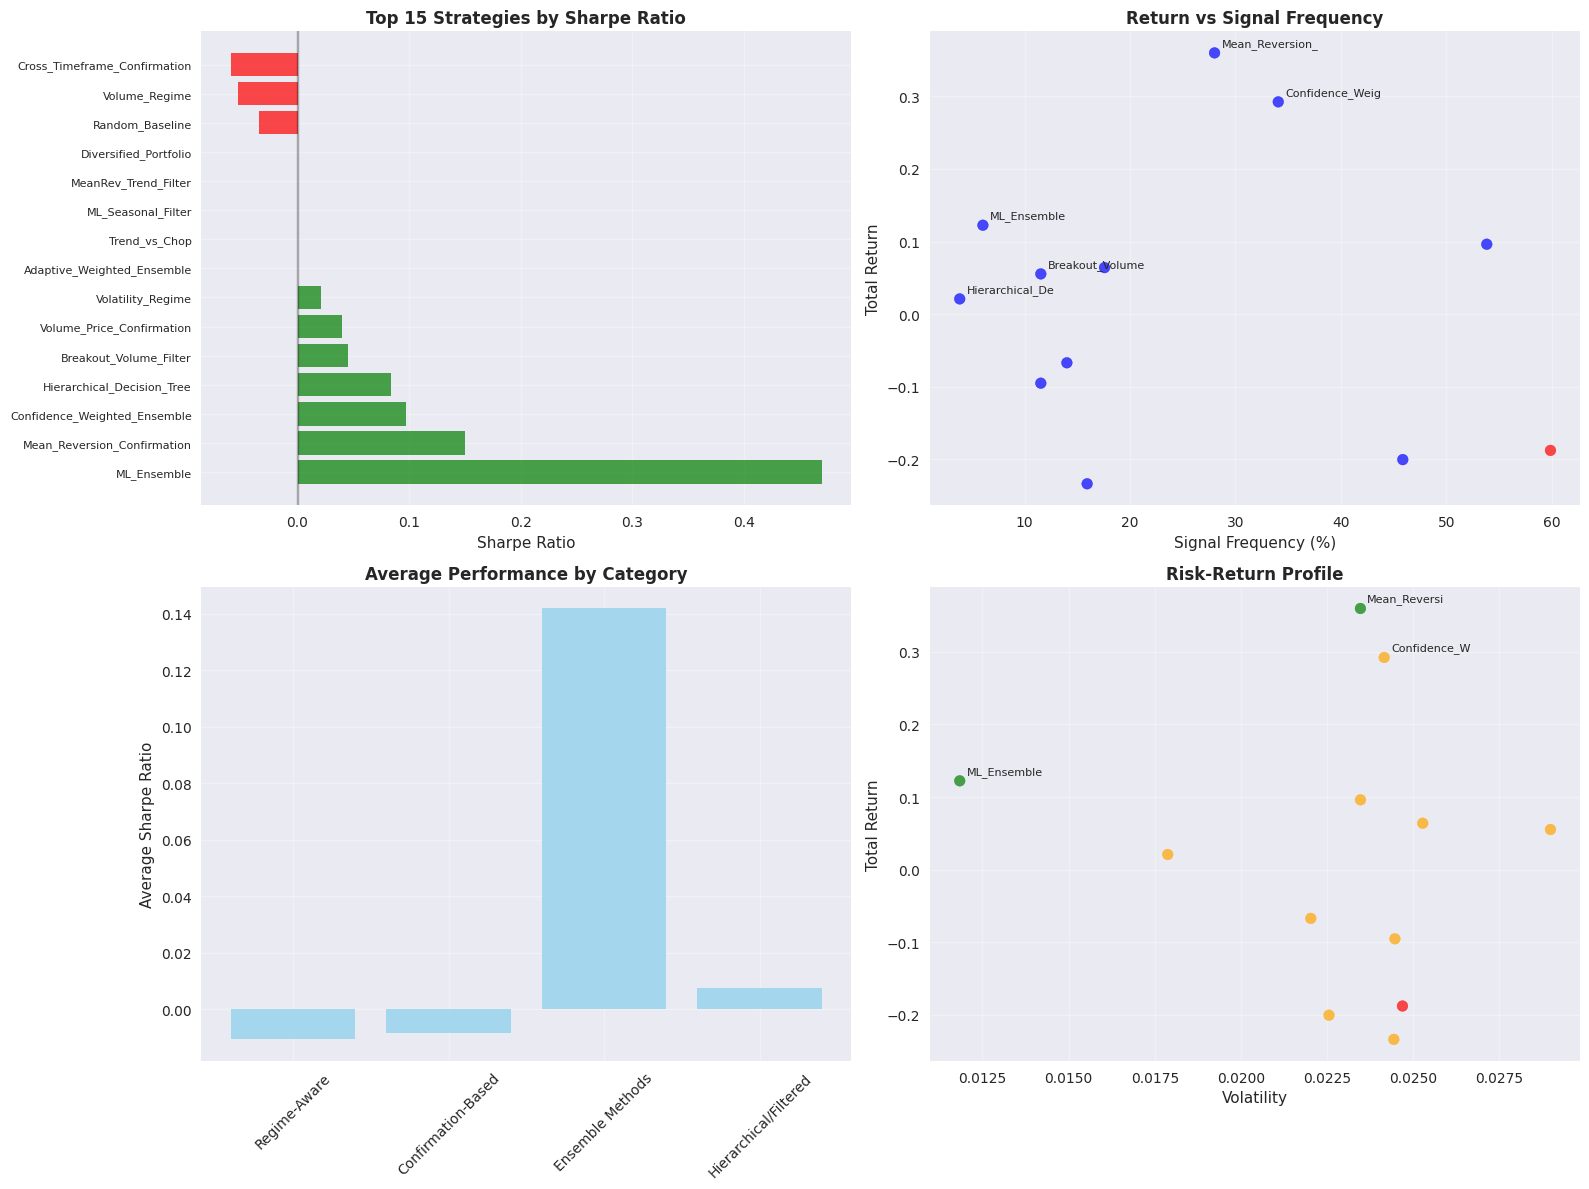

📊 Comprehensive visualizations generated!

🎯 KEY INSIGHTS FROM RESULTS:
🏆 Best Overall Strategy: ML_Ensemble
   • Sharpe Ratio: 0.470
   • Total Return: 0.122
   • Signal Frequency: 6.04%
   • Total Signals: 22

🏷️ Best Performing Category: Ensemble Methods
   • Average Sharpe: 0.142

📈 High-Frequency Strategies (>30% signals): 8
   • Average Sharpe: 0.004

📉 Low-Frequency Strategies (<10% signals): 2
   • Average Sharpe: 0.277

✅ COMPREHENSIVE SIGNAL COMBINATIONS ANALYSIS COMPLETE!
🚀 Ready for implementation and live testing!


In [17]:
# Create comprehensive visualization
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Sharpe Ratio Ranking
ax1 = axes[0, 0]
top_15 = performance_results.head(15)
colors = ['red' if name == 'Random_Baseline' else 'green' if sharpe > 0 else 'red' 
          for name, sharpe in zip(top_15['strategy_name'], top_15['sharpe_ratio'])]

bars1 = ax1.barh(range(len(top_15)), top_15['sharpe_ratio'], color=colors, alpha=0.7)
ax1.set_yticks(range(len(top_15)))
ax1.set_yticklabels(top_15['strategy_name'], fontsize=8)
ax1.set_xlabel('Sharpe Ratio')
ax1.set_title('Top 15 Strategies by Sharpe Ratio', fontweight='bold')
ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)
ax1.grid(True, alpha=0.3)

# Plot 2: Total Return vs Signal Frequency
ax2 = axes[0, 1]
scatter_colors = ['red' if name == 'Random_Baseline' else 'blue' 
                 for name in performance_results['strategy_name']]

scatter = ax2.scatter(performance_results['signal_frequency'] * 100, 
                     performance_results['total_return'],
                     c=scatter_colors, alpha=0.7, s=60)

ax2.set_xlabel('Signal Frequency (%)')
ax2.set_ylabel('Total Return')
ax2.set_title('Return vs Signal Frequency', fontweight='bold')
ax2.grid(True, alpha=0.3)

# Add labels for top performers
for _, row in performance_results.head(5).iterrows():
    ax2.annotate(row['strategy_name'][:15], 
                (row['signal_frequency'] * 100, row['total_return']),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

# Plot 3: Category Performance Comparison
ax3 = axes[1, 0]
category_performance = {}

for category, strategy_names in categories.items():
    category_results = performance_results[performance_results['strategy_name'].isin(strategy_names)]
    if not category_results.empty:
        category_performance[category] = category_results['sharpe_ratio'].mean()

if category_performance:
    categories_list = list(category_performance.keys())
    sharpe_values = list(category_performance.values())
    
    bars3 = ax3.bar(categories_list, sharpe_values, color='skyblue', alpha=0.7)
    ax3.set_ylabel('Average Sharpe Ratio')
    ax3.set_title('Average Performance by Category', fontweight='bold')
    ax3.tick_params(axis='x', rotation=45)
    ax3.grid(True, alpha=0.3)

# Plot 4: Risk-Return Profile
ax4 = axes[1, 1]
risk_return_colors = ['red' if name == 'Random_Baseline' else 'green' if sharpe > 0.1 else 'orange'
                     for name, sharpe in zip(performance_results['strategy_name'], 
                                           performance_results['sharpe_ratio'])]

ax4.scatter(performance_results['volatility'], 
           performance_results['total_return'],
           c=risk_return_colors, alpha=0.7, s=60)

ax4.set_xlabel('Volatility')
ax4.set_ylabel('Total Return')
ax4.set_title('Risk-Return Profile', fontweight='bold')
ax4.grid(True, alpha=0.3)

# Add labels for extreme points
for _, row in performance_results.head(3).iterrows():
    ax4.annotate(row['strategy_name'][:12], 
                (row['volatility'], row['total_return']),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

print("📊 Comprehensive visualizations generated!")
print("\n🎯 KEY INSIGHTS FROM RESULTS:")
print("=" * 50)

# Generate insights
if not performance_results.empty:
    best_strategy = performance_results.iloc[0]
    print(f"🏆 Best Overall Strategy: {best_strategy['strategy_name']}")
    print(f"   • Sharpe Ratio: {best_strategy['sharpe_ratio']:.3f}")
    print(f"   • Total Return: {best_strategy['total_return']:.3f}")
    print(f"   • Signal Frequency: {best_strategy['signal_frequency']:.2%}")
    print(f"   • Total Signals: {best_strategy['total_signals']:.0f}")
    
    # Category insights
    if category_performance:
        best_category = max(category_performance.keys(), key=lambda x: category_performance[x])
        print(f"\n🏷️ Best Performing Category: {best_category}")
        print(f"   • Average Sharpe: {category_performance[best_category]:.3f}")
    
    # Signal frequency insights
    high_freq_strategies = performance_results[performance_results['signal_frequency'] > 0.3]
    low_freq_strategies = performance_results[performance_results['signal_frequency'] < 0.1]
    
    if not high_freq_strategies.empty:
        print(f"\n📈 High-Frequency Strategies (>30% signals): {len(high_freq_strategies)}")
        print(f"   • Average Sharpe: {high_freq_strategies['sharpe_ratio'].mean():.3f}")
    
    if not low_freq_strategies.empty:
        print(f"\n📉 Low-Frequency Strategies (<10% signals): {len(low_freq_strategies)}")
        print(f"   • Average Sharpe: {low_freq_strategies['sharpe_ratio'].mean():.3f}")

print("\n" + "=" * 50)
print("✅ COMPREHENSIVE SIGNAL COMBINATIONS ANALYSIS COMPLETE!")
print("🚀 Ready for implementation and live testing!")
